In [26]:
import wrangle as w
import evaluate as e 
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

In [2]:
# get dataframe from local csv
df = w.get_zillow_data()

In [3]:
df = w.clean_zillow()

1590 outliers removed from bedroom.
8559 outliers removed from bathroom.
4412 outliers removed from area.
18673 outliers removed from property_value.
16 outliers removed from year.
21610 outliers removed from tax.

Total of 54860 outliers removed.


In [4]:
df.columns

Index(['bedroom', 'bathroom', 'area', 'property_value', 'year', 'tax', 'fips',
       'orange', 'ventura'],
      dtype='object')

In [12]:
t,v,tt = w.split_data(df)

In [6]:
def remove_encodes(df):
    return df[['bedroom', 'bathroom', 'area', 'property_value', 'year', 'tax']]

In [7]:
df = remove_encodes(df)

In [13]:
t2,v2,tt2 = w.mm_scale(t,v,tt)

In [14]:
eval_t = t[["area", "property_value"]]

In [15]:
from sklearn.linear_model import LinearRegression
def get_yhat(train, x, y):
    model = LinearRegression().fit(train[[x]], train[y])
    predictions = model.predict(train[[x]])
    train['baseline'] = train[y].mean()
    train['yhat'] = predictions
    return train

In [17]:
get_yhat(eval_t, "area", "property_value")

,area,property_value,baseline,yhat
95764,1336.0,112579.0,391230.80253,290344.143266
26088,1882.0,212447.0,391230.80253,412444.998064
1873299,884.0,241196.0,391230.80253,189264.314751
285118,833.0,274064.0,391230.80253,177859.289852
1900458,2840.0,287244.0,391230.80253,626680.563810
...,...,...,...,...
1842433,928.0,438312.0,391230.80253,199103.944076
1107106,3112.0,391906.0,391230.80253,687507.363270
1984259,1064.0,305243.0,391230.80253,229517.343806
614562,2865.0,366909.0,391230.80253,632271.262290


In [18]:
eval_t['residuals'] = eval_t.yhat - eval_t.property_value

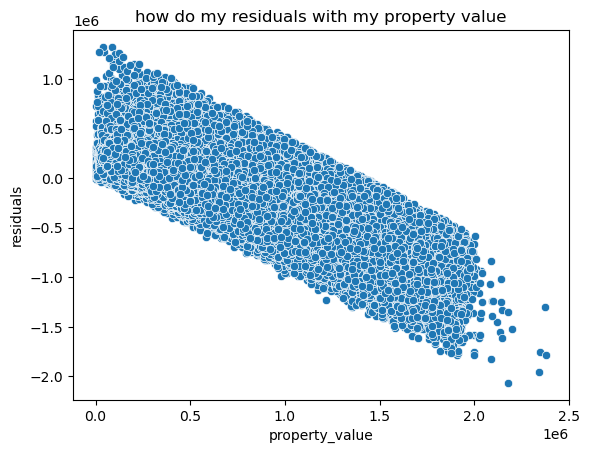

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=eval_t, y='residuals', x='property_value')
plt.title('how do my residuals with my property value')
plt.show()

In [34]:
MSE = mean_squared_error(eval_t.property_value, eval_t.yhat)
MSE

58943383608.44349

In [28]:
SSE = MSE * len(eval_t)
SSE

7.37514351554747e+16

In [29]:
RMSE = MSE ** .5
RMSE

242782.58506005633

In [30]:
ESS = sum((eval_t.yhat - eval_t.property_value.mean())**2)
ESS

3.6587140202809176e+16

In [31]:
TSS = ESS + SSE
TSS

1.1033857535828387e+17

In [32]:
eval_t['baseline'] = eval_t.property_value.mean()

In [35]:
MSE_baseline = mean_squared_error(eval_t.property_value, eval_t.baseline)
MSE_baseline

88184439535.87941

In [36]:
SSE_baseline = MSE_baseline * len(eval_t)
SSE_baseline

1.1033857535828072e+17

In [37]:
RMSE_baseline = MSE_baseline ** .5
RMSE_baseline

296958.64953875216

In [38]:
if SSE < SSE_baseline:
    print('my model is better than baseline!')
else:
    print('my model is not better than baseline!')


my model is better than baseline!


In [39]:
from sklearn.metrics import r2_score

In [40]:
r2_score(eval_t.property_value, eval_t.yhat)

0.33158974623338944

In [41]:
e.baseline_mean_errors(eval_t["property_value"])

(1.1033857535828072e+17, 88184439535.88228, 296958.64953875693)

In [42]:
def plot_residuals(y, yhat):
    residuals = yhat - y
    
    plt.scatter(x=y, y=residuals)
    plt.xlabel('Home Value')
    plt.ylabel('Residuals')
    plt.title('Residual vs Home Value Plot')
    plt.show()

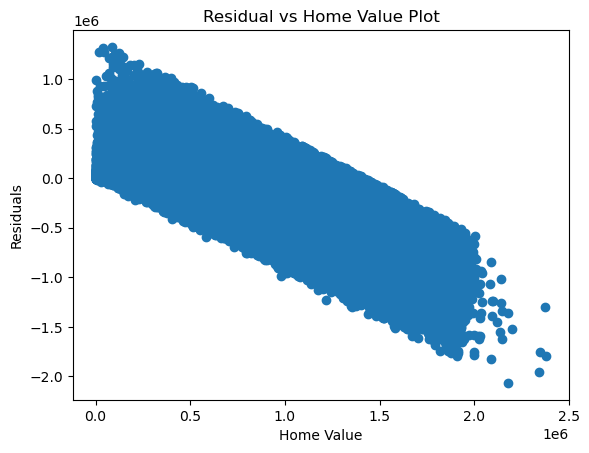

In [43]:
plot_residuals(eval_t.property_value, eval_t.yhat)